In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve,auc,log_loss,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import optuna

In [2]:
df_frutas = pd.read_csv('./fruit_quality.csv')

In [3]:
df_frutas.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [4]:
df_frutas.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987968,bad
3991,3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,good
3992,3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,good
3993,3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,bad
3994,3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [5]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [6]:
df_frutas.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


## EDA

In [7]:
px.bar(df_frutas.value_counts('Quality')/len(df_frutas) * 100)

In [8]:
# Transformar a variável Quality em numérica
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

In [9]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


In [10]:
df_frutas.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [11]:
# Remover a coluna A_id
df_frutas.drop(columns='A_id',axis=1, inplace=True)

In [12]:
df_frutas.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


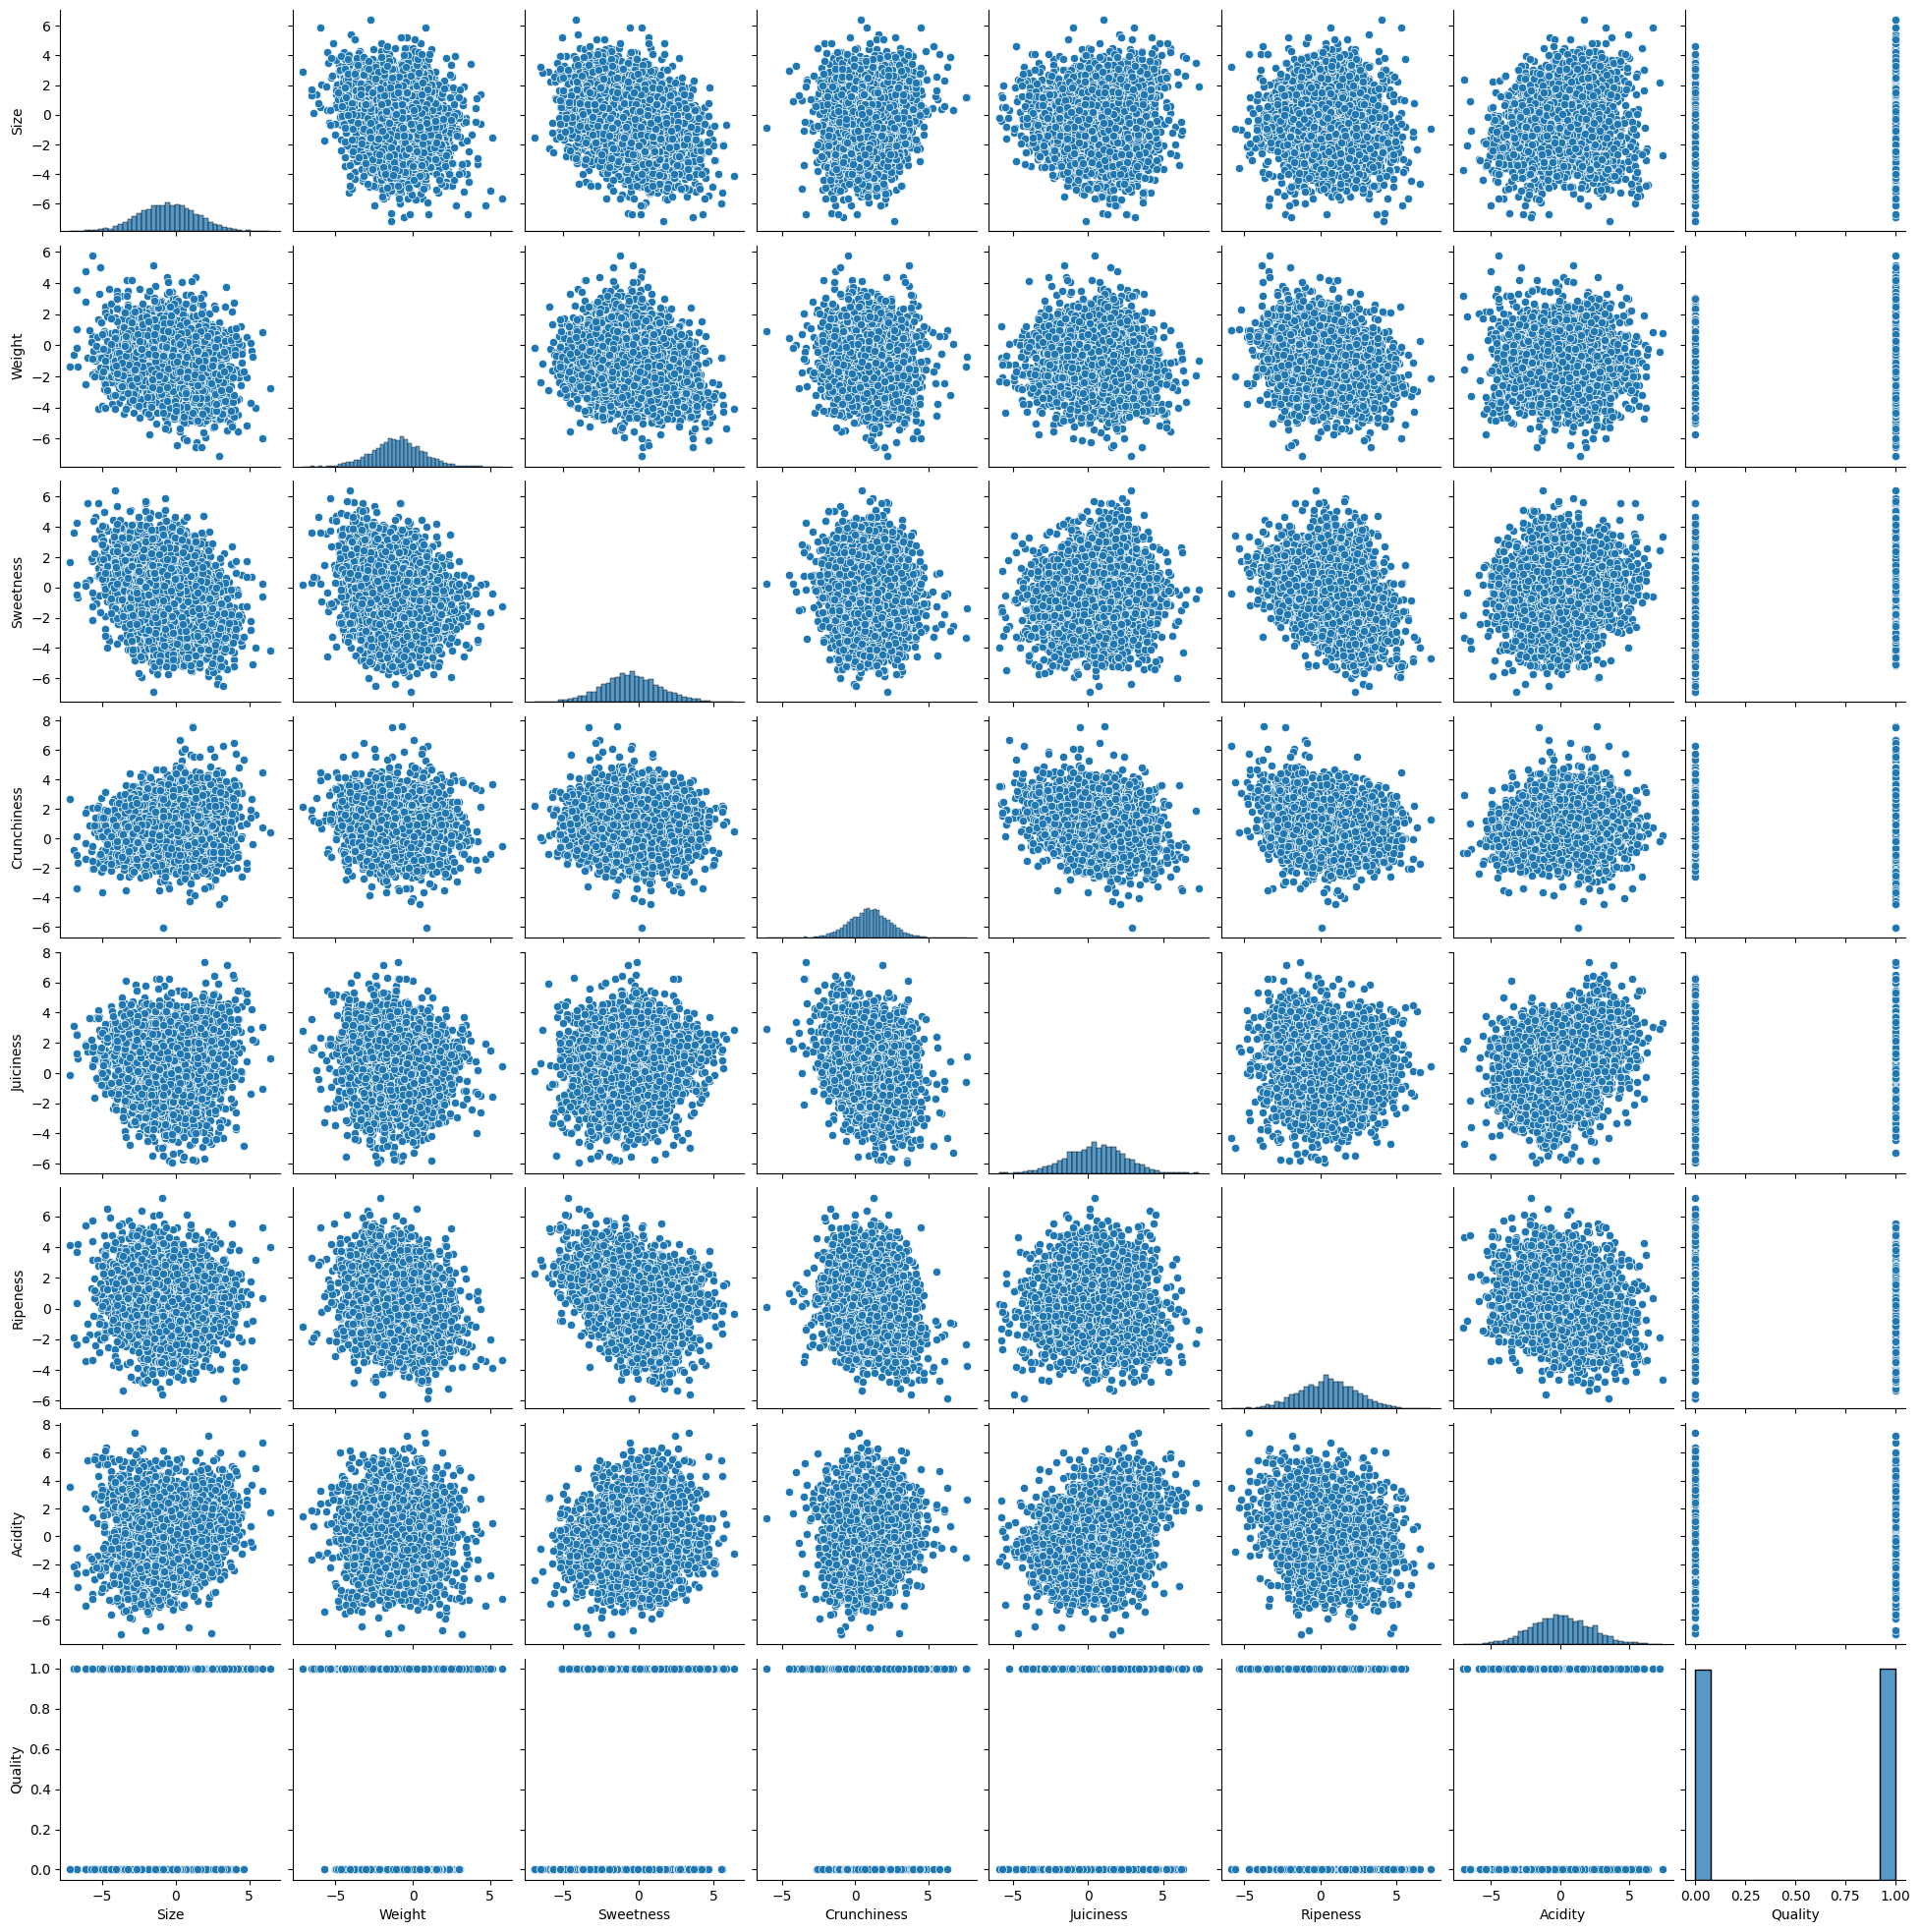

In [13]:
# Verificar distribuição e correlação de variáveis de uma forma visual

sns.pairplot(df_frutas)

In [14]:
# BoxPlot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality')

In [19]:
# Boxplot de Size com Quality
px.box(df_frutas, x='Quality',y='Size',color='Quality')

In [17]:
# Boxplot de Size com Quality
px.box(df_frutas, x='Quality',y='Sweetness',color='Quality')

In [22]:
# Teste estatistico para verificar se existe uma diferença significativa entre as médias dos 2 grupos
# H0 não há diferença siginificativa entre as médias dos grupos
# H1 há uma diferença significativa entre as médias dos grupos

grupo_good_weight = df_frutas[df_frutas['Quality'] == 1]['Weight']
grupo_bad_weight = df_frutas[df_frutas['Quality'] == 0]['Weight']

ttest(grupo_good_weight,grupo_bad_weight)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.089906,3599.742464,two-sided,0.928367,"[-0.09, 0.1]",0.002841,0.036,0.050925


In [23]:
grupo_good_sweetness = df_frutas[df_frutas['Quality'] == 1]['Sweetness']
grupo_bad_sweetness = df_frutas[df_frutas['Quality'] == 0]['Sweetness']

ttest(grupo_good_sweetness,grupo_bad_sweetness)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.396437,3995.125489,two-sided,1.590329e-58,"[0.86, 1.09]",0.51847,7.576e+54,1.0


In [24]:
grupo_good_size = df_frutas[df_frutas['Quality'] == 1]['Size']
grupo_bad_size = df_frutas[df_frutas['Quality'] == 0]['Size']

ttest(grupo_good_size,grupo_bad_size)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.912978,3951.450727,two-sided,2.602204e-55,"[0.82, 1.06]",0.5031,5.053e+51,NaN
